In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.utils import to_categorical

C:\Users\Atharva\AppData\Local\Temp\ipykernel_14824\2526158423.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


a. Loading and preprocessing the image data

In [2]:
cifar_train=pd.read_csv('./train_data.csv')
x_train=cifar_train.drop('label',axis=1).values
y_train=cifar_train['label'].values

print(x_train.shape)
print(y_train.shape)

(50000, 3072)
(50000,)


In [3]:
cifar_test=pd.read_csv('./test_data.csv')
x_test=cifar_test.drop('label',axis=1).values
y_test=cifar_test['label'].values

print(x_test.shape)
print(y_test.shape)

(10000, 3072)
(10000,)


In [4]:
x_train=x_train/255.0
x_test=x_test/255.0

x_train=x_train.reshape((-1,32,32,3))
x_test=x_test.reshape((-1,32,32,3))

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


b. Defining the model's architecture

In [5]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])

c:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


c. Training the model

In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [7]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.3552 - loss: 1.7341 - val_accuracy: 0.5695 - val_loss: 1.2252
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5893 - loss: 1.1624 - val_accuracy: 0.6380 - val_loss: 1.0318
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.6574 - loss: 0.9671 - val_accuracy: 0.6668 - val_loss: 0.9625
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7060 - loss: 0.8487 - val_accuracy: 0.6552 - val_loss: 0.9939
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7377 - loss: 0.7530 - val_accuracy: 0.6798 - val_loss: 0.9551
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7627 - loss: 0.6813 - val_accuracy: 0.7047 - val_loss: 0.8876
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7814 - loss: 0.6223 - val_accuracy: 0.7051 - val_loss: 0.8989
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.8007 -

d. Estimating the model's performance

In [8]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f'Test accuracy:{test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7165 - loss: 0.8999
Test accuracy:0.7190999984741211


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Actual Label:  airplane
Predicted Label:  automobile


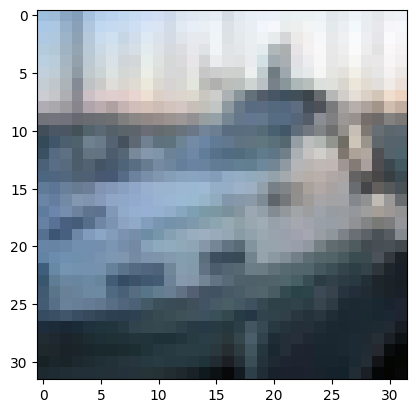

In [12]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

n=2
plt.imshow(x_test[n].reshape(32,32,3))

predictions=model.predict(x_test)

print("Actual Label: ",classes[np.argmax(y_test[n])])
print("Predicted Label: ", classes[np.argmax(predictions[n])])